# SECOND ASSIGNMENT. MACHINE LEARNING WITH SCIKIT-LEARN. 
## PART I (1.5 POINTS)

The aim of part I of the Scikit-learn assignment is for you to self-learn and get used to this Machine Learning tool. The main part (part II) of the assignment will be explained next week (11/12). 

Here, you will learn to:

- Perform a crossvalidation on the iris classification problem with decision trees (so far, we have only done regression)
- Perform a crossvalidation on the iris classification problem **with KNN** (I haven't explained this, you will have to learn how to use it from the web)
- Perform grid search in order to determine the best value for hyper-parameter K

You will also have to go through two notebooks I have prepared for you in order to see how crossvalidation and hyper-parameter tuning are used in Scikit-learn




# 0. Carry out the "DECISION TREES WITH A TRAINING AND A TESTING SET AND CROSSVALIDATION" notebook and understand the main ideas

## 1. Perform a crossvalidation on the iris classification problem with decision trees:

** It is important to remember that for classification, you have to use**
- clf = tree.DecisionTreeClassifier() # for constructing the classifier
- metrics.accuracy # for computing error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score, KFold
from sklearn import metrics
import numpy as np

iris = load_iris()

X = iris.data
y = iris.target

cv = KFold(X.shape[0], 10, shuffle=True) # getting a random partition
scores = cross_val_score(tree.DecisionTreeClassifier(),X, y,
                         scoring='accuracy', 
                         cv = cv)

print("CV accuracy estimation: "+str(np.mean(scores)))

CV accuracy estimation: 0.94


**COMMENTARIES:**

Being imported from sklearn and from numpy what we need, we load iris dataset and set x as the attibutes and target as the classes. 

With the function KFold we specify we want a random partition of 10 sets of the data .

cross_val_scores function performs the cross validation for the decision tree classifier, scoring the accuracy using the cv partition (output of the KFold function we used before). Finally we print the mean accuracy estimation as our estimation.

## 2. Perform a crossvalidation on the iris classification problem with KNN

I haven't explained how to use KNN in Scikit-learn. You will have to read and obtain the relevant information [here](http://scikit-learn.org/stable/modules/neighbors.html)

In [6]:
from sklearn import neighbors as NN

scores = cross_val_score(NN.KNeighborsClassifier(),X, y,
                         scoring='accuracy',cv = cv) # default K=5

print("CV accuracy estimation: "+str(np.mean(scores)))

CV accuracy estimation: 0.96


**COMMENTARIES:**

We do exactly the same except for the method we want to stimate the accuracy. In this case is KNeighborsClassifier. 

## 3. Try different values for K (KNN) - change them by hand- and see if you obtain a better result than with KNN default value. Always use crossvalidation.

In [10]:
for i in range(1,10):
    scores=cross_val_score(NN.KNeighborsClassifier(n_neighbors=i),X, y,scoring='accuracy',cv = cv)
    print("K = "+ str(i)+" neighbors: " +"CV accuracy estimation= "+str(np.mean(scores)) +"\n")

K = 1 neighbors: CV accuracy estimation= 0.96

K = 2 neighbors: CV accuracy estimation= 0.946666666667

K = 3 neighbors: CV accuracy estimation= 0.96

K = 4 neighbors: CV accuracy estimation= 0.96

K = 5 neighbors: CV accuracy estimation= 0.966666666667

K = 6 neighbors: CV accuracy estimation= 0.953333333333

K = 7 neighbors: CV accuracy estimation= 0.96

K = 8 neighbors: CV accuracy estimation= 0.973333333333

K = 9 neighbors: CV accuracy estimation= 0.966666666667



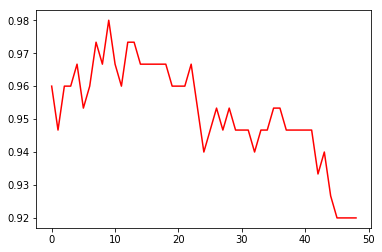

In [11]:
import matplotlib.pyplot as plt
Ktop=50
scores=[]

for i in range(1,Ktop):
    errors=cross_val_score(NN.KNeighborsClassifier(n_neighbors=i),X, y,scoring='accuracy',cv = cv)
    scores.append(np.mean(errors))

plt.plot(scores,'r')
plt.show()

**COMMENTARIES:**

Keeping the same partition for cross validation and changing from 1 to 50 the hyperparameter "number of neighbours" in the algorithm, we could say that the best value of the hyperparameter is K=8 (in this case, it gives us the highest accuracy).

## 4. Carry out THE "DECISION TREE HYPER-PARAMETERS. TUNING DECISION TREES" notebook and understand the main ideas

## 5. USE GRID SEARCH AND RANDOMIZED SEARCH TO FIND THE OPTIMAL VALUE FOR K

- GRID SEARCH

In [7]:
from sklearn.grid_search import GridSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': range(1,50,1)}

clf = GridSearchCV(NN.KNeighborsClassifier(), 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = clf.fit(X,y)


clf.best_params_, clf.best_score_

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Wall time: 535 ms


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.4s finished


({'n_neighbors': 6}, 0.98)

**COMMENTARIES:**

Being imported the function GridSearchCV, we specify the param_grid in which there are all the possible values for the hyperparameter n_neighbors (from 1 to 50).

Then we apply GridSearchCV for the method KNeighborsClassifier scoring the accuracy with 5-fold-crossvalidation.

Finally, we see the time it took and also the best parameter (K=6) with its accuracy score (0.98).

- RANDOMIZED SEARCH

In [8]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
np.random.seed(0)

param_dist = {'n_neighbors': range(1,50,1)}

n_iter_search = 20
clfrs = RandomizedSearchCV(NN.KNeighborsClassifier(), 
                                   param_distributions=param_dist,
                                   scoring='accuracy',
                                   cv=5 , n_jobs=1, verbose=1,
                                   n_iter=n_iter_search)
clfrs.fit(X,y)
clfrs.grid_scores_.sort()
for line in clfrs.grid_scores_[0:25]:
    print(line)
    
clfrs.best_params_, clfrs.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3}
mean: 0.97333, std: 0.02494, params: {'n_neighbors': 5}
mean: 0.96667, std: 0.02981, params: {'n_neighbors': 8}
mean: 0.98000, std: 0.02667, params: {'n_neighbors': 11}
mean: 0.98000, std: 0.02667, params: {'n_neighbors': 12}
mean: 0.96667, std: 0.02981, params: {'n_neighbors': 16}
mean: 0.96667, std: 0.02981, params: {'n_neighbors': 19}
mean: 0.94667, std: 0.03399, params: {'n_neighbors': 27}
mean: 0.94000, std: 0.03887, params: {'n_neighbors': 28}
mean: 0.93333, std: 0.04216, params: {'n_neighbors': 29}
mean: 0.94000, std: 0.03887, params: {'n_neighbors': 30}
mean: 0.93333, std: 0.04216, params: {'n_neighbors': 31}
mean: 0.94667, std: 0.03399, params: {'n_neighbors': 32}
mean: 0.94000, std: 0.03887, params: {'n_neighbors': 33}
mean: 0.95333, std: 0.02667, params: {'n_neighbors': 34}
mean: 0.95333, std: 0.02667, params: {'n_neighbors': 35}
mean: 0.93333, std: 0.04216, 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


({'n_neighbors': 11}, 0.98)

**COMMENTARIES:**

Being imported the function RandomizedSearchCV, we specify the param_dist in which it is going to do the random search for possible values for the hyperparameter n_neighbors (from 1 to 50).

Then we apply RandomizedSearchCV (specifying previously n_iter_search = 20) for the method KNeighborsClassifier scoring the accuracy with 5-fold-crossvalidation. 

Finally, we see the time it took (obviously in this case less time) and also the best parameter (K=11) with its accuracy score (0.98).


# 6. OPTIONAL (you may get 0.25 extra points if you decide to do this). 

K is the main hyper-parameter of KNN. Find another hyper-parameter that you consider relevant, and try to optimize both K and the other parameter using grid-search. Are you able to improve on previous results?

In [9]:
from sklearn.grid_search import GridSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': range(1,50,1),
              'weights':('uniform', 'distance'),
              'metric':('euclidean','manhattan','chebyshev','minkowski')}

clf = GridSearchCV(NN.KNeighborsClassifier(), 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = clf.fit(X,y)

clf.best_params_, clf.best_score_

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Wall time: 4.07 s


[Parallel(n_jobs=1)]: Done 1960 out of 1960 | elapsed:    4.0s finished


({'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'},
 0.9866666666666667)

**COMMENTARIES:**
    
We decided to include the hyperparameters:

- Weights: Uniform if we give the same importance for the K nearest neighbors, or Distance if we give weighted importance depending on the distance (the closer the more) for the K nearest neighbours.

- Metric: Using the following different distances ir order to calculate the K nearest neighbours: Euclidean, Manhatan, Chebyshev and Minkoski.

Then the process is exactly the same we have done for grid search, obtaining the best hyperparameters: 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance',  with its accuracy score (0.98).